## CStree from (Duarte & Solus, 2022)

In [1]:
import networkx as nx
import numpy as np

import cstrees.cstree as ct
import cstrees.stage as st

%load_ext autoreload
%autoreload 2

### Create the CStree

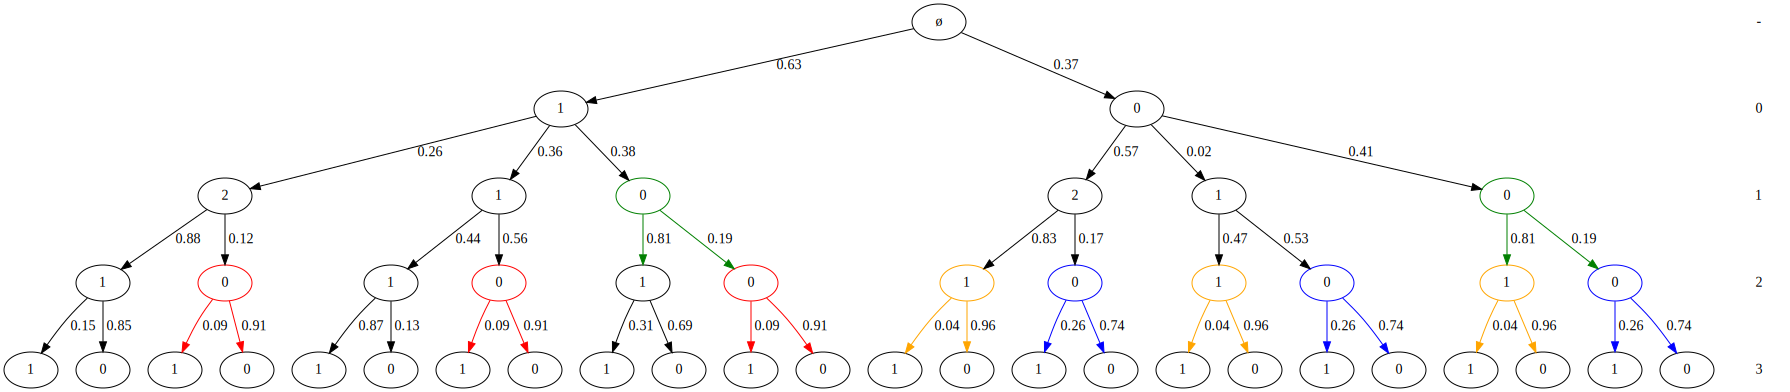

In [2]:
np.random.seed(2)

tree = ct.CStree([2, 3, 2, 2])

tree.update_stages({
    0: [st.Stage([0]), st.Stage([1])],
    1: [st.Stage([{0, 1}, 0], color="green"), st.Stage([0, 1]), st.Stage([1, 1]), st.Stage([0, 2]), st.Stage([1, 2])],
    2: [st.Stage([0, {0, 1, 2}, 0], color="blue"),
        st.Stage([0, {0, 1, 2}, 1], color="orange"),
        st.Stage([1, {0, 1, 2}, 0], color="red"),
        st.Stage([1, 2, 1]),
        st.Stage([1, 1, 1]),
        st.Stage([1, 0, 1])]
})

tree.sample_stage_parameters(alpha=1)
tree.plot(full=True)

In [3]:
tree.to_df()

,0,1,2,3
0,2,3,2,2
1,0,-,-,-
2,1,-,-,-
3,*,0,-,-
4,0,1,-,-
5,1,1,-,-
6,0,2,-,-
7,1,2,-,-
8,0,*,0,-
9,0,*,1,-


### The CSI relations

In [4]:
rels = tree.csi_relations()
for cont, rels in rels.items():
    for rel in rels:
        print(rel)

0 ⊥ 2 | 1=0
1 ⊥ 3 | 0=0, 2=0
1 ⊥ 3 | 0=0, 2=1
1 ⊥ 3 | 0=1, 2=0


### The minimal context CSI relations

In [5]:
minl_csis = tree.to_minimal_context_csis()
for cont, csis in minl_csis.items():
    for csi in csis:
        print(csi)

0 ⊥ 2 | 1=0
1 ⊥ 3 | 0, 2=0
1 ⊥ 3 | 2, 0=0


### The minimal context DAGs

In [6]:
# Get Graphviz graphs for plotting
agraphs = tree.to_minimal_context_agraphs()
keys = list(agraphs.keys())


1=0


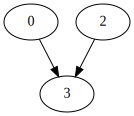

In [7]:
print(keys[0])
agraphs[keys[0]]

2=0


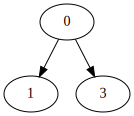

In [8]:
print(keys[1])
agraphs[keys[1]]

0=0


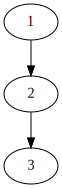

In [9]:
print(keys[2])
agraphs[keys[2]]

### Sampling data

In [10]:
df = tree.sample(10)
df

,0,1,2,3
0,2,3,2,2
1,1,2,1,0
2,1,1,0,0
3,1,0,0,0
4,0,2,1,0
5,1,0,1,0
6,1,2,1,0
7,1,2,1,1
8,0,0,1,0
9,0,2,1,0


### Write the CStree structure to a Pandas dataframe

In [11]:
treedf = tree.to_df(write_probs=True)
treedf

,0,1,2,3,PROB_0,PROB_1,PROB_2
0,2,3,2,2,NaN,NaN,NaN
1,0,-,-,-,0.410027,0.018807,0.571166
2,1,-,-,-,0.376522,0.359301,0.264176
3,*,0,-,-,0.191666,0.808334,NaN
4,0,1,-,-,0.534362,0.465638,NaN
5,1,1,-,-,0.563052,0.436948,NaN
6,0,2,-,-,0.167056,0.832944,NaN
7,1,2,-,-,0.117001,0.882999,NaN
8,0,*,0,-,0.738383,0.261617,NaN
9,0,*,1,-,0.957600,0.042400,NaN


### Read CStree from a Pandas dataframe

In [12]:
t = ct.df_to_cstree(treedf)
t.to_df(write_probs=True)

,0,1,2,3,PROB_0,PROB_1,PROB_2
0,2,3,2,2,NaN,NaN,NaN
1,0,-,-,-,0.410027,0.018807,0.571166
2,1,-,-,-,0.376522,0.359301,0.264176
3,*,0,-,-,0.191666,0.808334,NaN
4,0,1,-,-,0.534362,0.465638,NaN
5,1,1,-,-,0.563052,0.436948,NaN
6,0,2,-,-,0.167056,0.832944,NaN
7,1,2,-,-,0.117001,0.882999,NaN
8,0,*,0,-,0.738383,0.261617,NaN
9,0,*,1,-,0.957600,0.042400,NaN


Use plot(full=True) to draw the full tree.


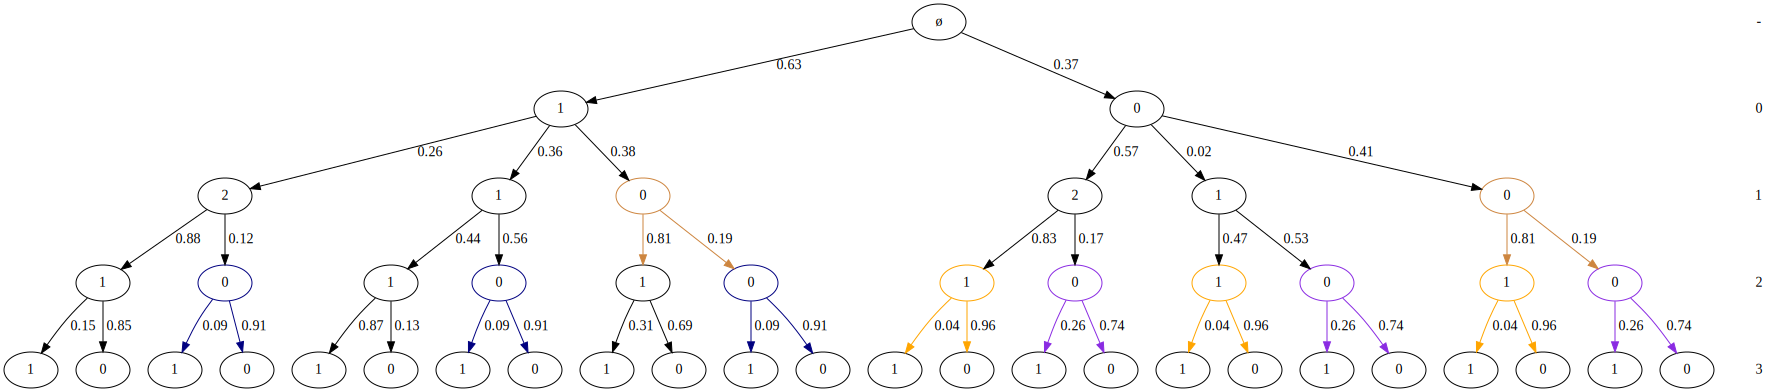

In [13]:
t.plot()